In [3]:
# Loading the required packages and libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the data

In [4]:
df = pd.read_csv(r'C:\Users\Shayeda\Documents\DATAMITES INTERN\HOUSE_PRED\Data\data.csv')

## 2. Exploring the data

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Here we check the percentage of nan values present in each feature

In [6]:
feautres_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [7]:
feautres_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
for features in feautres_na:
    print(features,np.round(df[features].isnull().mean(),4),'%')

LotFrontage 0.1774 %
Alley 0.9377 %
MasVnrType 0.0055 %
MasVnrArea 0.0055 %
BsmtQual 0.0253 %
BsmtCond 0.0253 %
BsmtExposure 0.026 %
BsmtFinType1 0.0253 %
BsmtFinType2 0.026 %
FireplaceQu 0.4726 %
GarageType 0.0555 %
GarageYrBlt 0.0555 %
GarageFinish 0.0555 %
GarageQual 0.0555 %
GarageCond 0.0555 %
PoolQC 0.9952 %
Fence 0.8075 %
MiscFeature 0.963 %


We might want to remove columns with more than 50% missing values

In [9]:
more_than_50_percent_misssing_value_features = [features for features in feautres_na if (np.round(df[features].isnull().mean(),4)) > 0.5]


In [10]:
more_than_50_percent_misssing_value_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

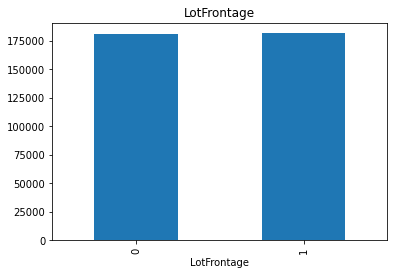

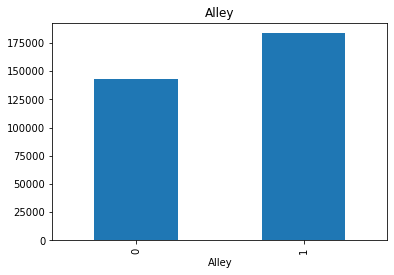

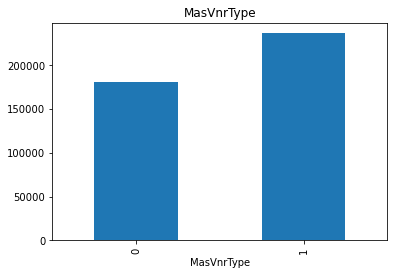

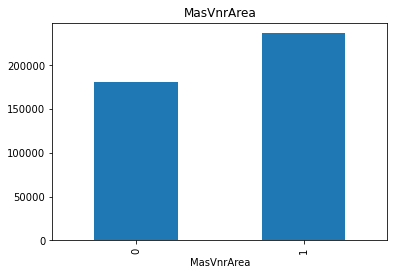

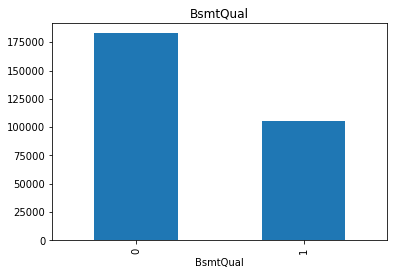

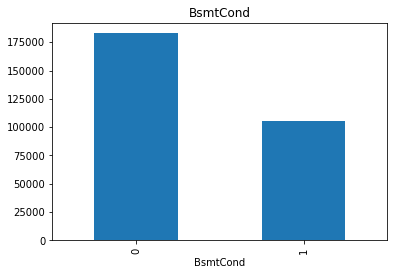

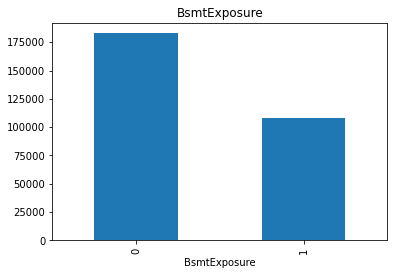

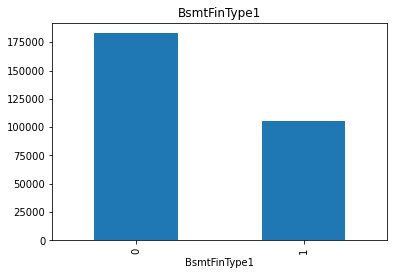

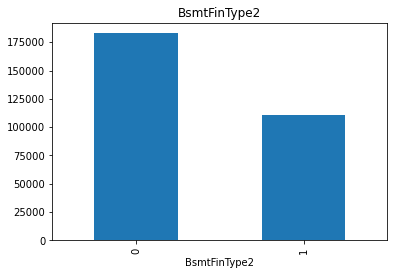

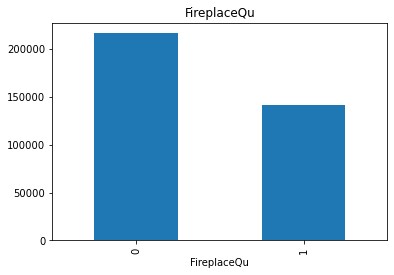

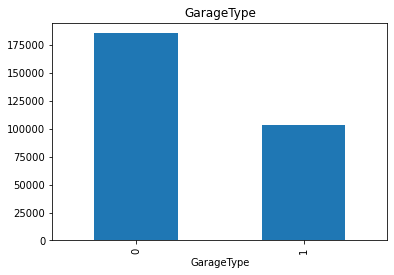

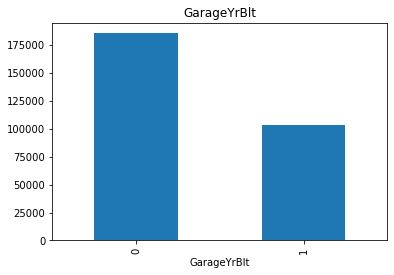

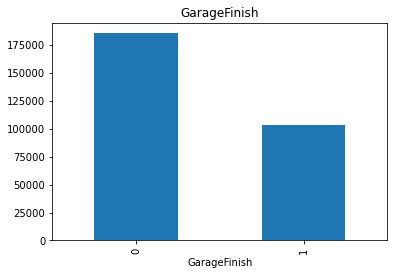

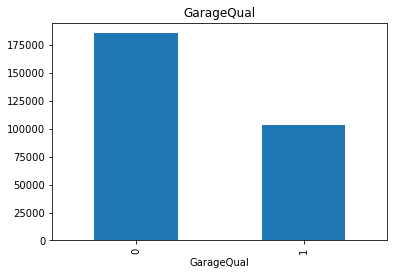

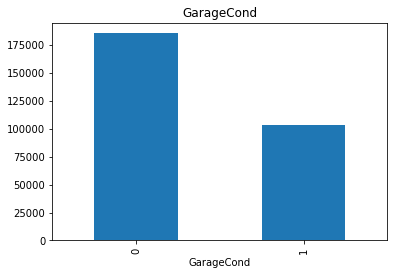

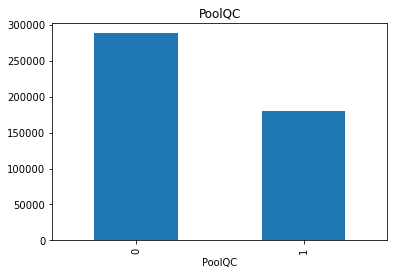

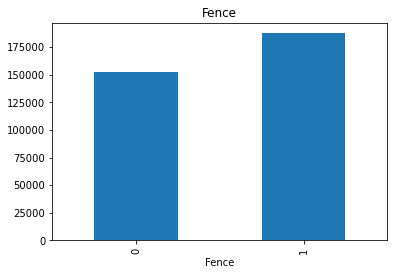

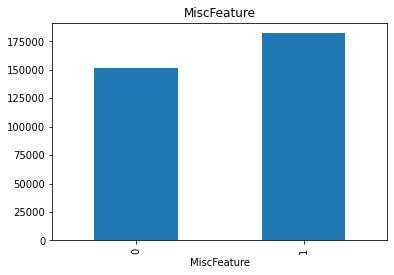

In [11]:

for feature in feautres_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0) # replacing missing value with 1 and rest with 0
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

We observe that the data with the missing values and the dependent variable(Sales Price) is clearly visible.So We need to replace these missing values with meaningful data.   
Now we see the which features are having numerical data.   


In [12]:
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [13]:
df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


So we see that there are 38 features which are numerical.   
Also we see that, some columns are having year.So we try to find out the fields which contain year information.As these will be used to calculate the age of house.

In [14]:
year_features = [features for features in numerical_features if "Yr" in features or "Year" in features]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Observing the SalesPrice as per the year sold

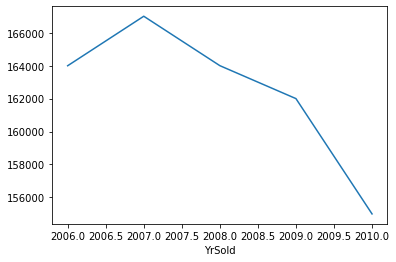

In [15]:
df.groupby('YrSold')['SalePrice'].median().plot()

We observe that the price is decresing as the years are more recent, which is very strange, so we look further

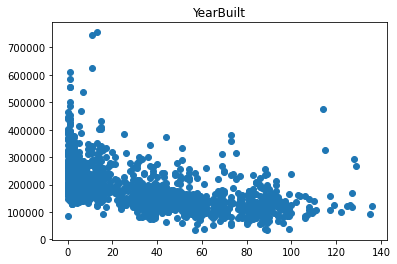

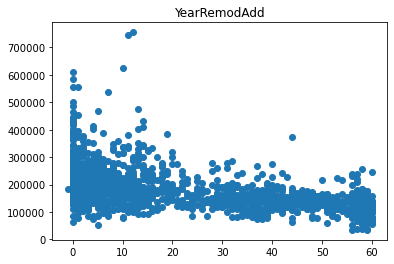

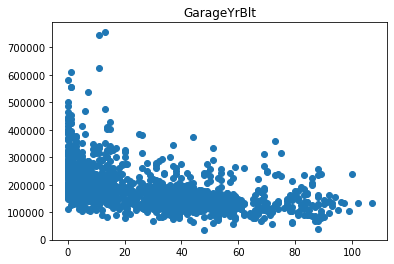

In [16]:
for feature in year_features:
    if feature != "YrSold":
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

For each case we see that the house price is more for the house which is recently built and sold, which is reasonable 

Going on further, for numerical variables we observe that it can be of 2 types. Discrete and continous. If we take a limit of 25 distinct values as discreate variables, let us try to find the discrete variables.

In [17]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [18]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


We see that ther are 17 discrete variables

We try to explore its relation with SalePrice

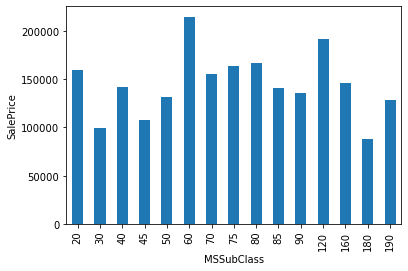

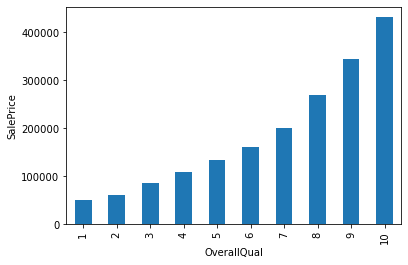

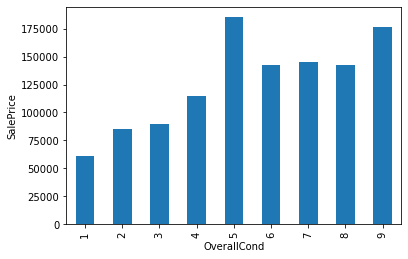

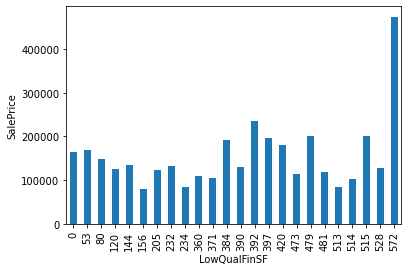

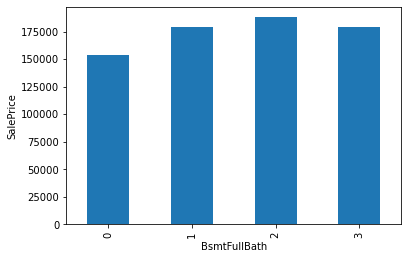

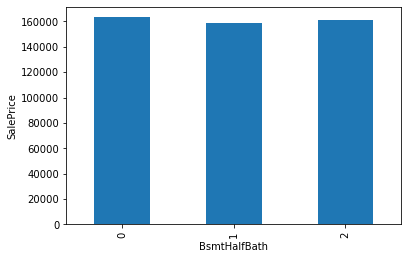

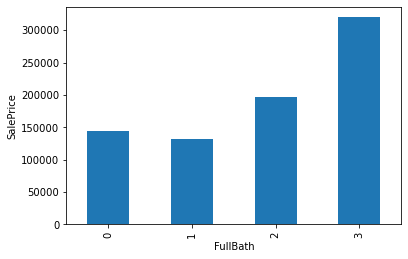

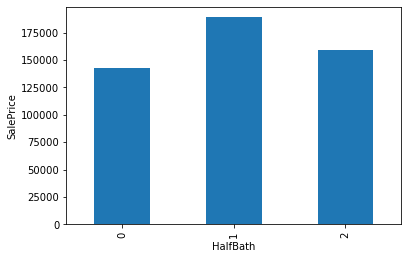

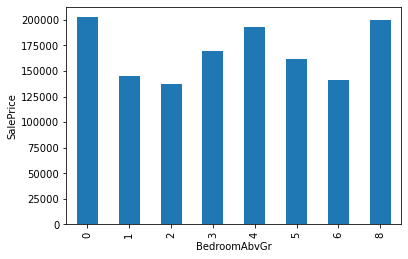

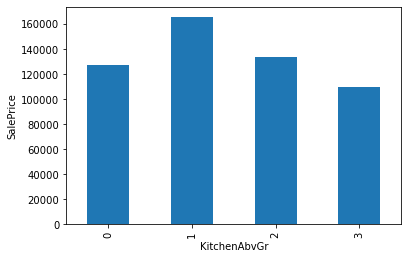

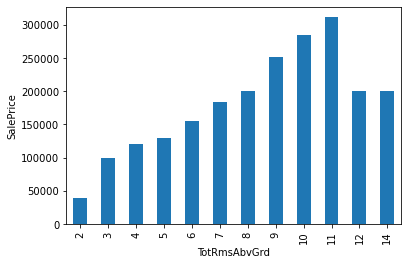

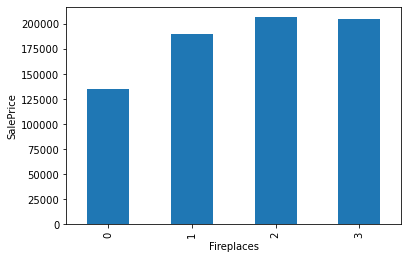

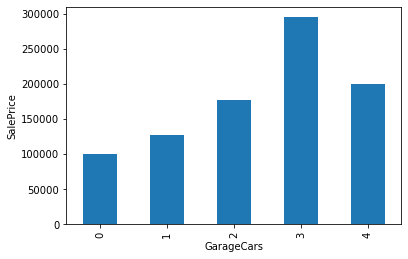

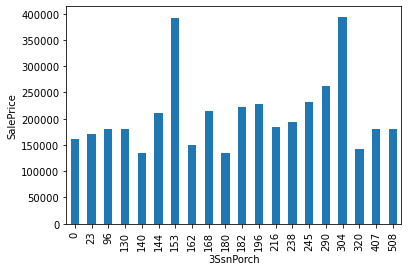

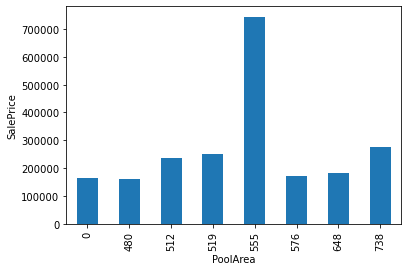

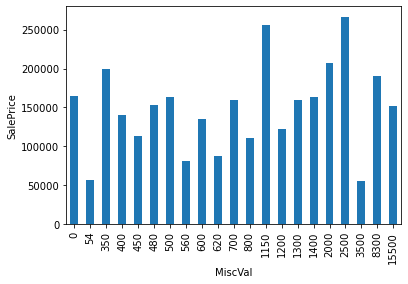

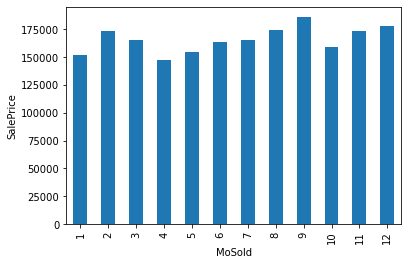

In [19]:
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

We observe that there is some relationship between these discrete variables and SalePrice

Now we see the continous numerical features

In [20]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

Using histograms for continous numerical variable to study the pattern

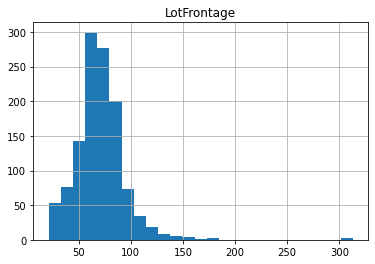

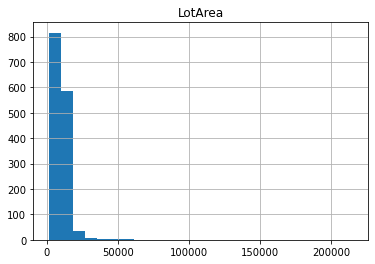

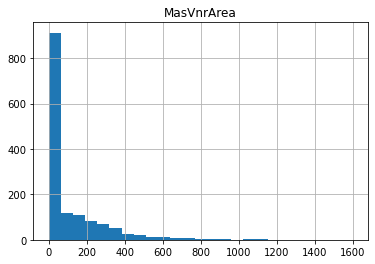

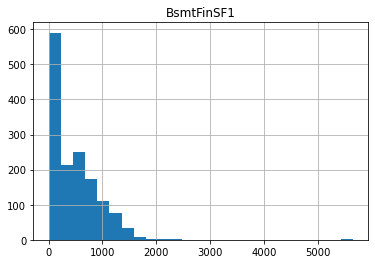

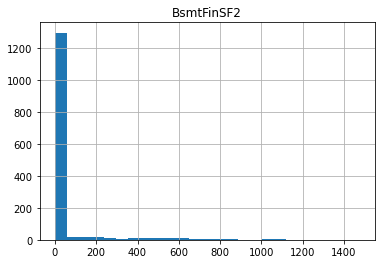

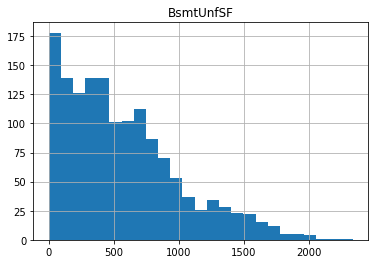

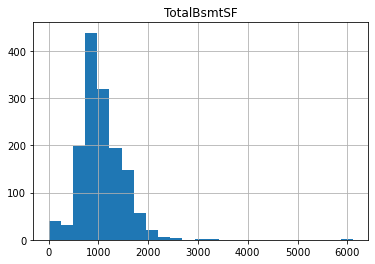

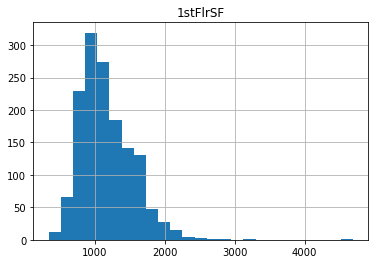

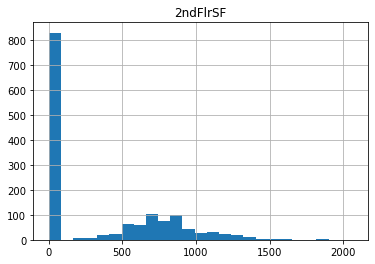

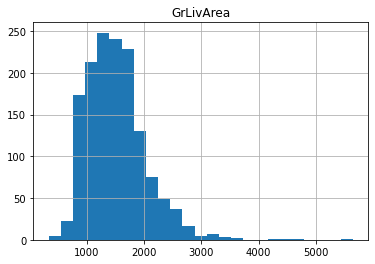

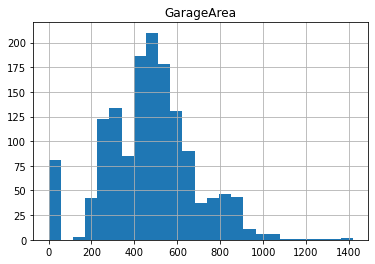

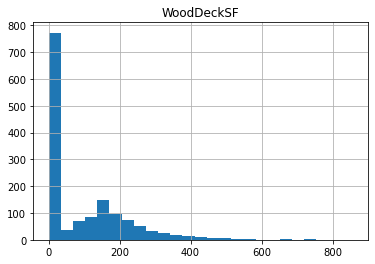

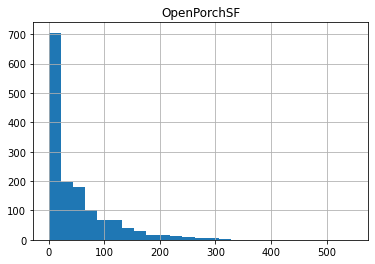

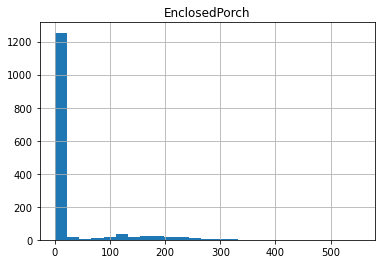

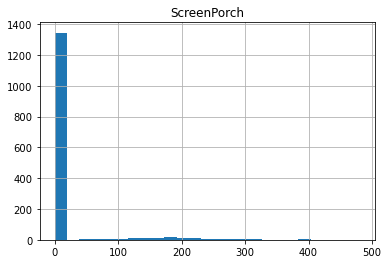

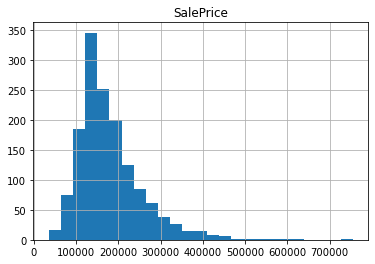

In [21]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)
    
    plt.show()

We observe that some of the distributions are gaussian, but others are skewed

We try to normalise the skewed ones with lograthmic transformation

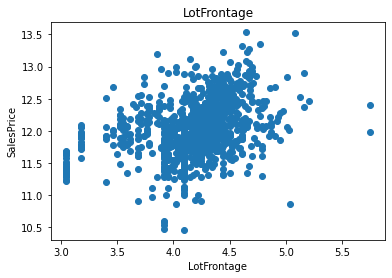

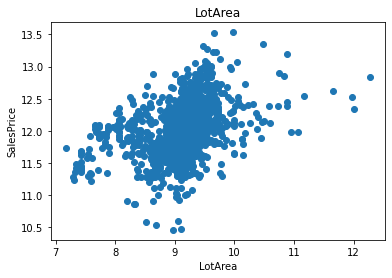

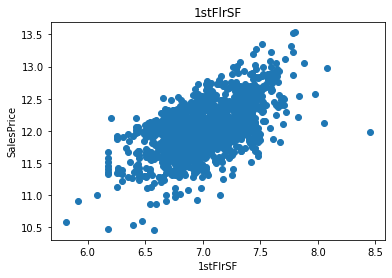

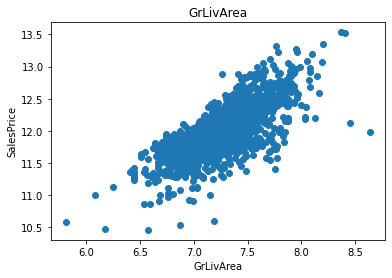

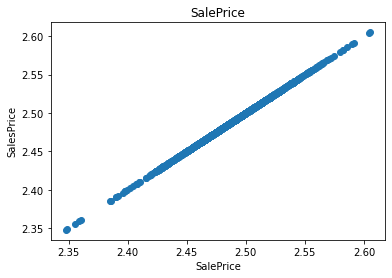

In [20]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        

We see that there is a positive correlation betweent he features and the SalePrice

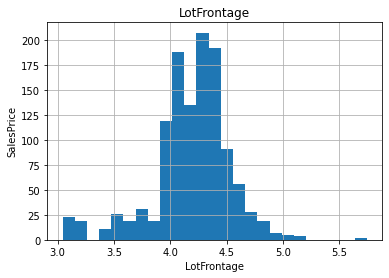

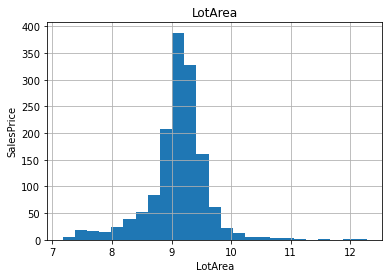

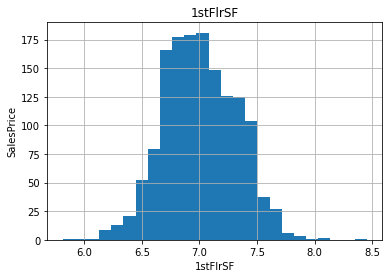

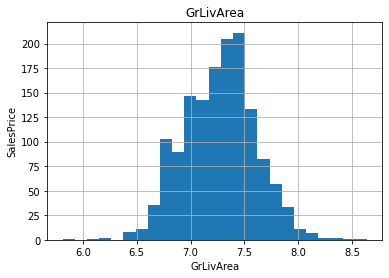

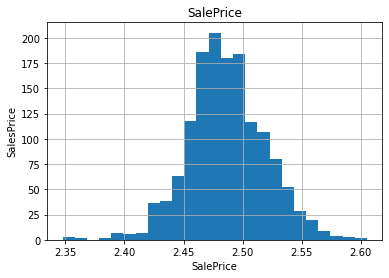

In [22]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        data[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

Now we search for outliers

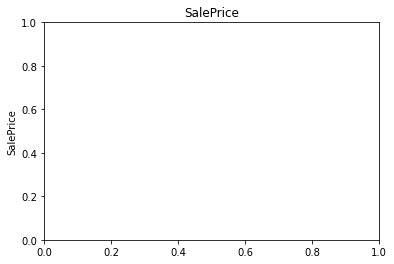

In [23]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        #data.boxplot(column=feature)
        plt.ylabel(feature)
        #plt.ylabel('SalesPrice')
        plt.title(feature)

Now we go for categorical features

In [24]:
categorical_features =[feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(df[feature].unique())))

Distinct categories for MSZoning  are 5
Distinct categories for Street  are 2
Distinct categories for Alley  are 3
Distinct categories for LotShape  are 4
Distinct categories for LandContour  are 4
Distinct categories for Utilities  are 2
Distinct categories for LotConfig  are 5
Distinct categories for LandSlope  are 3
Distinct categories for Neighborhood  are 25
Distinct categories for Condition1  are 9
Distinct categories for Condition2  are 8
Distinct categories for BldgType  are 5
Distinct categories for HouseStyle  are 8
Distinct categories for RoofStyle  are 6
Distinct categories for RoofMatl  are 8
Distinct categories for Exterior1st  are 15
Distinct categories for Exterior2nd  are 16
Distinct categories for MasVnrType  are 5
Distinct categories for ExterQual  are 4
Distinct categories for ExterCond  are 5
Distinct categories for Foundation  are 6
Distinct categories for BsmtQual  are 5
Distinct categories for BsmtCond  are 5
Distinct categories for BsmtExposure  are 5
Distinct 

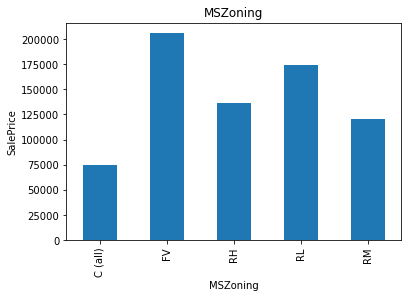

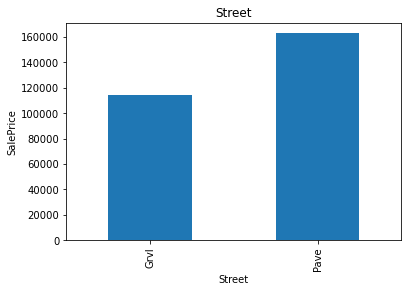

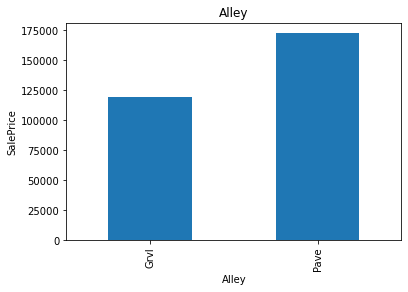

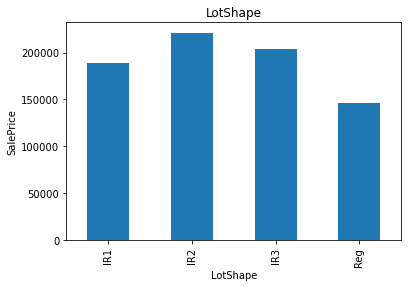

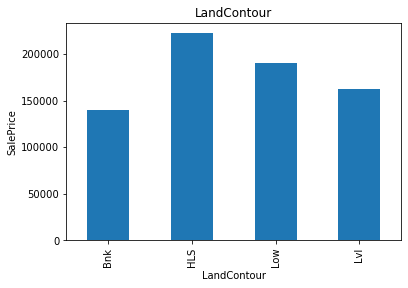

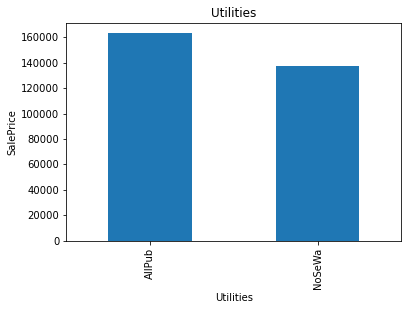

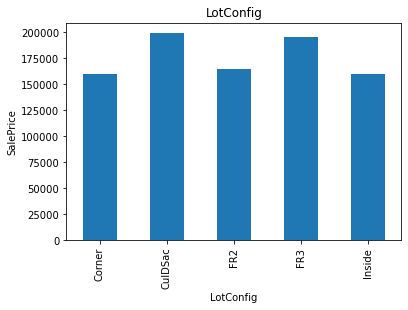

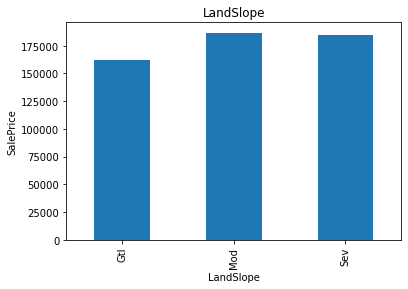

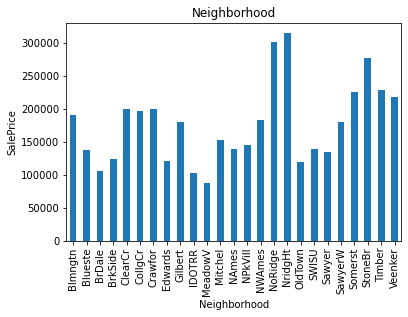

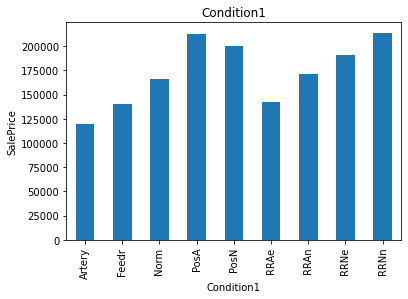

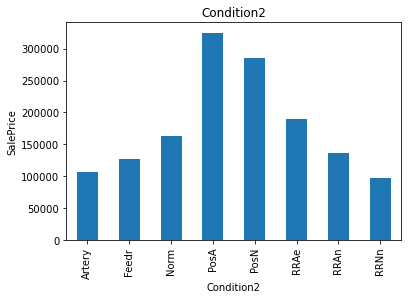

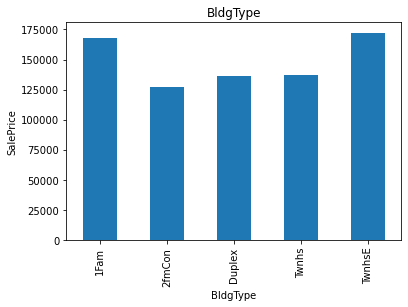

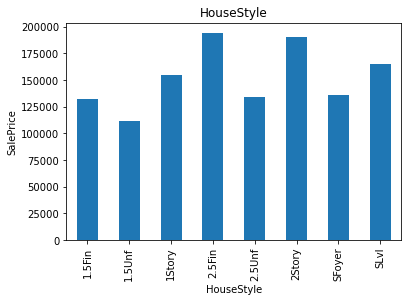

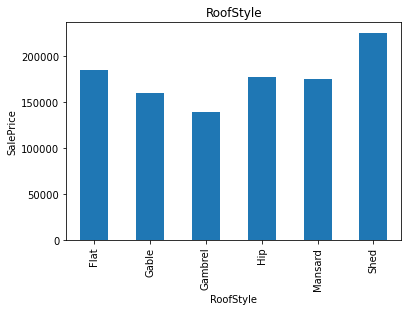

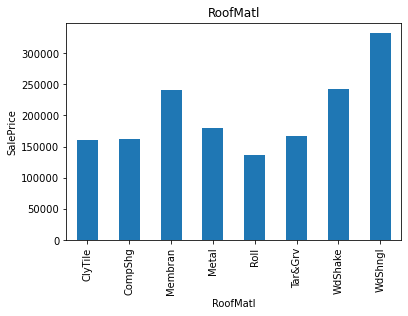

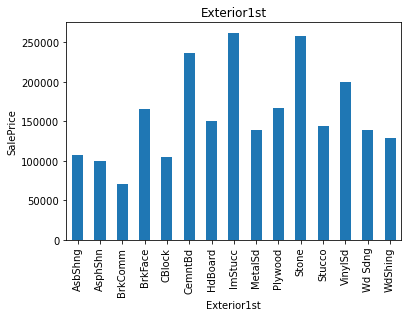

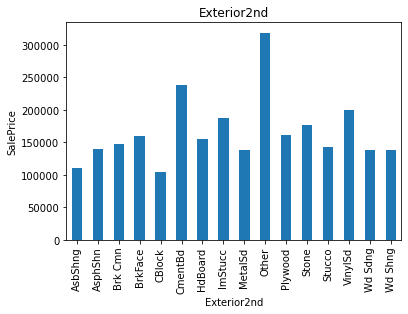

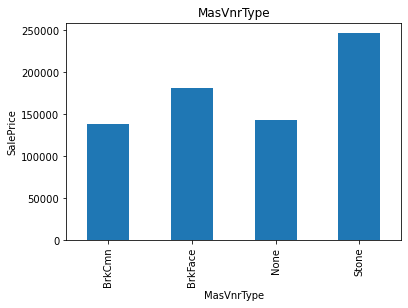

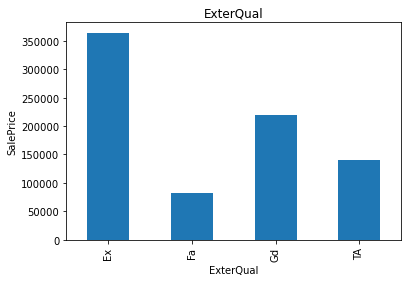

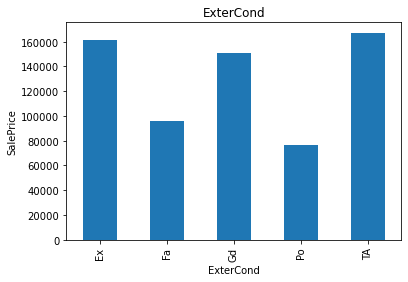

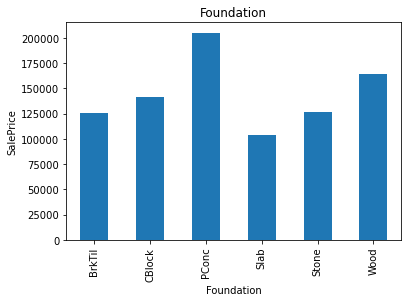

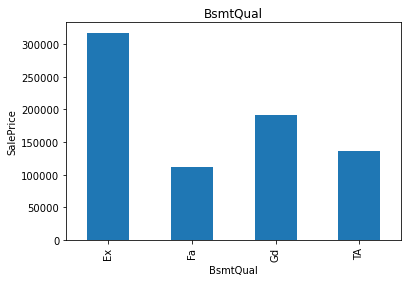

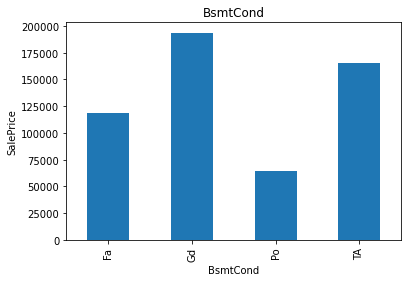

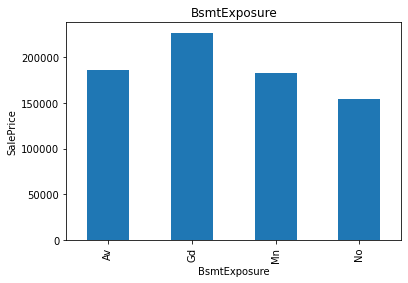

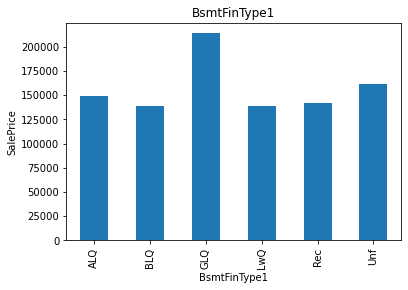

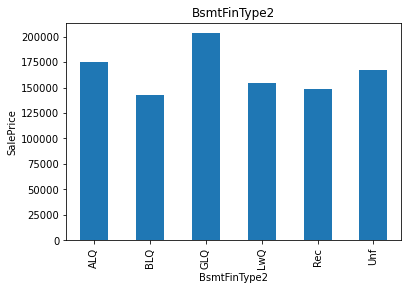

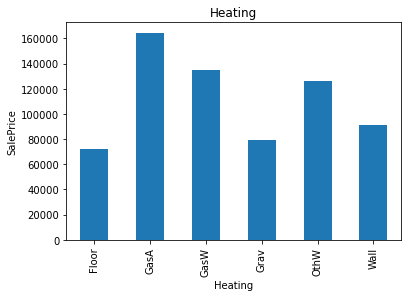

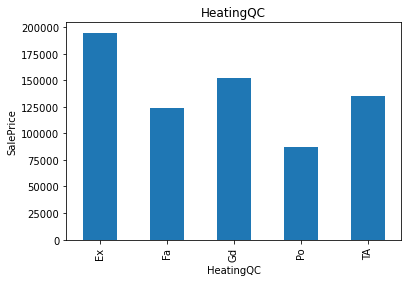

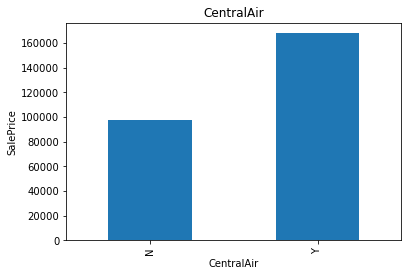

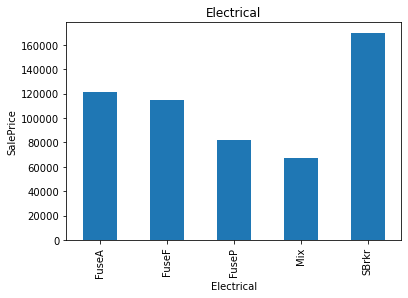

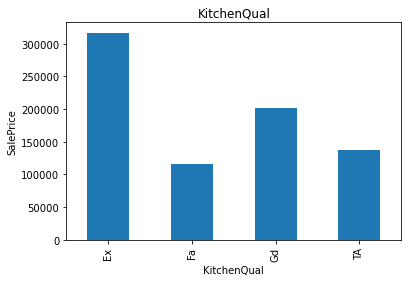

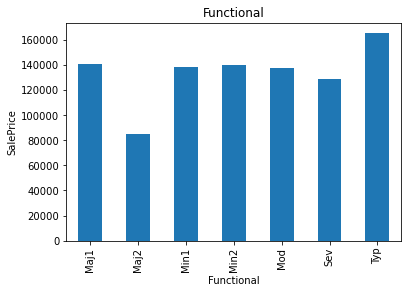

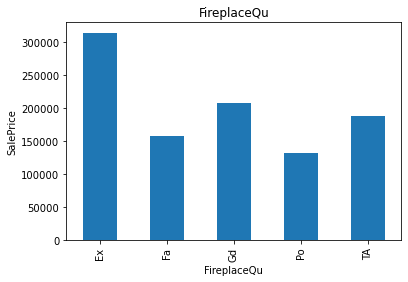

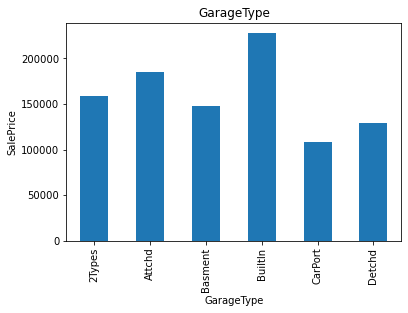

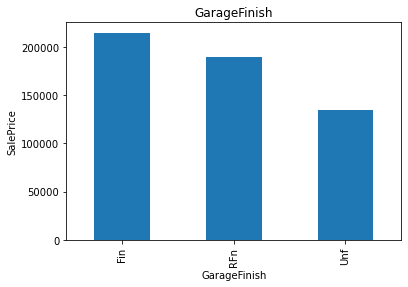

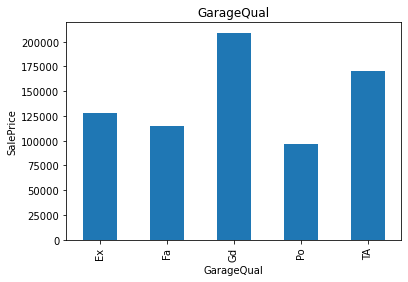

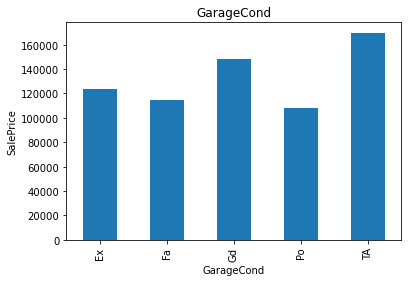

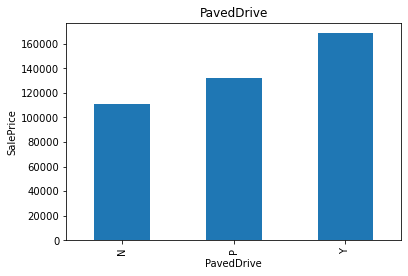

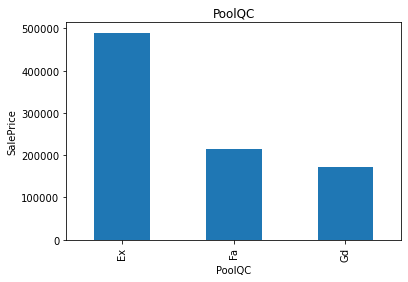

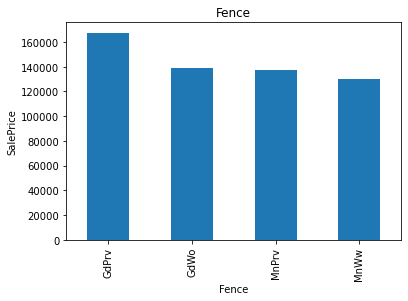

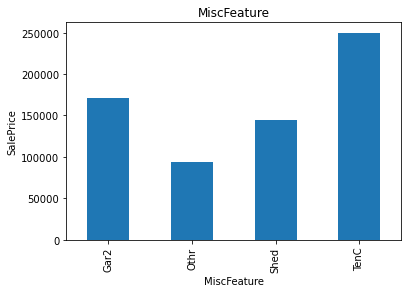

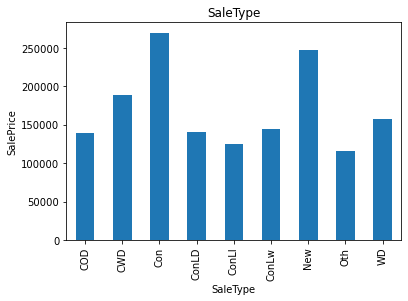

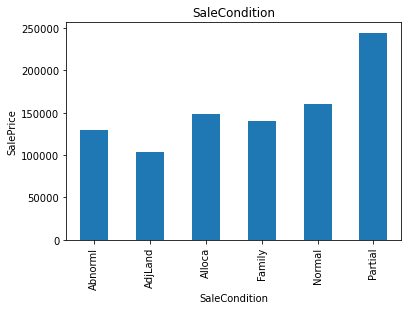

In [26]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [27]:
df.shape

(1460, 81)

#### We see that there are 79 features 

In [28]:
# Checking the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

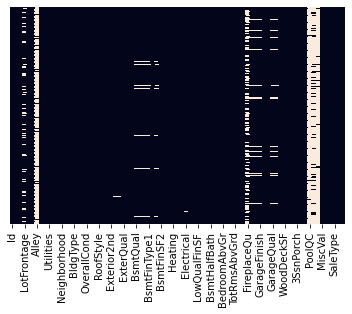

In [29]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3. Data cleaning

###         3.1 Missing value handling

Filling the missing value we need to see the test and train data simultaneously.     
We will be replacing the null values with mode for categorical values, discrete numerical values and year variables  
We will be replacing the null values with mean for continous numerical values.    
We will delete columns with more than 50% null values as the available information add no value for our model.    

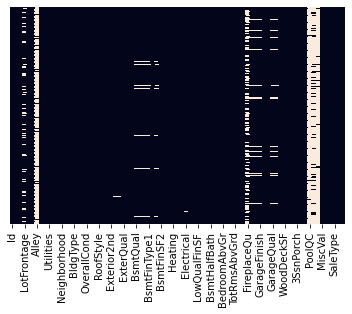

In [31]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [32]:
for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train                          

In [33]:
for feature in discrete_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train  

In [34]:
for feature in year_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train

In [35]:
# as sales price is absent in test data so we want to remove it from the feature list
continous_numerical_features = [feature for feature in continous_features if feature not in 'SalePrice']

In [36]:
for feature in continous_numerical_features:
    df[feature] = df[feature].fillna(df[feature].mean())                 #train 

In [37]:
for feature in more_than_50_percent_misssing_value_features:
    df.drop([feature],axis = 1, inplace = True)  

##### We will also drop the id column as it is not useful for prediction

In [38]:
df.drop(['Id'],axis = 1, inplace = True)

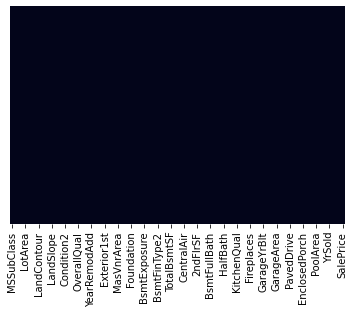

In [39]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [40]:
df.shape

(1460, 76)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [42]:
df.shape

(1460, 76)

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(1460, 76)

## 4. Feature Engineering

### 4.1 Handling rare categorical features
There may be some features that are less than 1% in the feature, we can remove them as they are not adding any value to the relationship between the feature and the SalePrice

In [45]:
# replacing rare variables with "Rare_v" for train 
'''
for feature in categorical_features:
    temp = df.groupby(feature)['SalePrice'].count() / len(df)
    temp_df = temp[temp > 0.01].index
    df[feature] = np.where (df[feature].isin(temp_df), df[feature],'Rare_var') 
'''   

"\nfor feature in categorical_features:\n    temp = df.groupby(feature)['SalePrice'].count() / len(df)\n    temp_df = temp[temp > 0.01].index\n    df[feature] = np.where (df[feature].isin(temp_df), df[feature],'Rare_var') \n"

### 4.2 Data Transformation by one Hot Encoding of categorical variables

In [46]:
columns =[feature for feature in df.columns if df[feature].dtypes == 'O']
len(columns)

39

#### Converting categorical variables to one hot encoding

In [47]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [48]:
# making a copy of dataframe for future use
main_df=df.copy()

In [49]:
# train files to implement one hot encoding
final_df=df

In [50]:
final_df.shape

(1460, 76)

In [51]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [52]:
final_df.shape

(1460, 237)

In [53]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [57]:
final_df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [54]:
final_df.shape

(1460, 177)

In [58]:
from sklearn.model_selection import train_test_split
X=final_df.drop(['SalePrice'],axis=1)
y=final_df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [59]:
X_train.shape

(1168, 176)

In [60]:
y_train.shape

(1168,)

In [61]:
X_test.shape

(292, 176)

In [62]:
y_test.shape

(292,)

In [61]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
X_train['GarageYrBlt'] = pd.to_numeric(X_train['GarageYrBlt'])

<ipython-input-63-32daa1161c8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageYrBlt'] = pd.to_numeric(X_train['GarageYrBlt'])


In [64]:
X_train['GarageYrBlt']

727     2007.0
29      1920.0
1295    1968.0
1437    2008.0
396     1985.0
         ...  
229     2005.0
70      1973.0
132     1974.0
1313    1999.0
109     1977.0
Name: GarageYrBlt, Length: 1168, dtype: float64

## 5. Base Model implementation and evaluating it's RMSE

In [65]:
# implementing XGBoost regressor
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
# predicting the house prices
y_predict = classifier.predict(X_test)

In [67]:
# displaying the house price
y_predict

array([242723.16 , 207539.44 , 112681.31 , 105169.59 , 357908.28 ,
       190260.97 , 148845.94 , 163843.31 , 161603.7  , 183637.83 ,
       126612.51 , 164029.84 ,  37721.74 , 166011.48 , 217211.67 ,
       222473.05 , 148542.73 , 169665.88 , 298627.94 , 145839.16 ,
       178948.97 , 428419.66 , 119217.55 , 185344.11 , 141293.06 ,
       183016.17 , 240648.36 , 121655.97 , 345448.3  , 246719.47 ,
       134536.3  , 128679.08 , 176213.3  , 128584.52 , 113966.8  ,
       128927.234, 180009.6  , 206235.44 ,  86653.75 , 131821.   ,
        89951.63 , 175812.92 , 151435.34 , 268529.72 , 142634.86 ,
       320229.78 , 142295.36 , 206337.27 , 167555.62 , 209289.75 ,
       204380.17 , 223766.61 , 157024.55 , 135546.61 , 321470.22 ,
       141251.98 , 107083.625, 101569.734, 473377.16 , 270115.75 ,
       142140.12 , 154422.11 , 210371.88 ,  92241.125, 328957.28 ,
       182705.44 ,  81824.13 , 160848.69 , 121197.05 , 135262.1  ,
       186716.11 , 223682.14 , 141235.66 , 142938.73 , 203704.

In [102]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_predict, squared=False)
rms

27037.269360916158

#### Base Mode Results

 Got an RMSE score of 0.14065  on kaggle leaderboard
 Got an RMSE score of 0.14400  on kaggle leaderboard(second time)
 0.14106

## 6. Hyper parameter tuning

In [68]:

regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]

learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }


In [69]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [70]:

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [86]:
# finding the best estimate
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Using the above results we tune our regerssor for better performance

In [92]:
# substituting the best parameters
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
y_predict1 = regressor.predict(X_test)

In [95]:
y_predict1

array([229490.16 , 187370.47 , 114012.57 , 122463.9  , 320951.12 ,
       181912.25 , 173485.05 , 164201.19 , 160039.05 , 185795.39 ,
       140566.83 , 166162.83 ,  57151.12 , 156998.58 , 215236.9  ,
       219404.95 , 146421.05 , 156112.98 , 348046.   , 139303.8  ,
       219545.14 , 392783.44 , 110507.734, 193368.62 , 146981.3  ,
       183889.66 , 217218.73 , 113493.01 , 357648.78 , 268768.28 ,
       131808.8  , 123761.18 , 187973.56 , 129764.44 ,  83371.586,
       129796.09 , 176048.73 , 194934.88 ,  95103.68 , 122205.2  ,
       116325.89 , 184980.62 , 151449.83 , 249547.86 , 128536.12 ,
       340645.7  , 162701.61 , 203493.19 , 186046.19 , 204112.27 ,
       219179.69 , 215539.1  , 172464.58 , 139844.53 , 339774.1  ,
       144496.02 , 124247.37 ,  93660.98 , 467597.12 , 365655.3  ,
       143191.1  , 146623.1  , 204198.42 ,  89266.22 , 323027.2  ,
       176652.52 , 102119.805, 163518.94 , 117603.83 , 124290.945,
       193828.98 , 228540.62 , 132153.47 , 143257.92 , 228225.

In [101]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_predict1, squared=False)
rms

22602.92613440596

In [104]:
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]

learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [105]:
regressor = xgboost.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=100,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=50)

In [106]:

random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=4,
                   para

In [107]:
# finding the best estimate
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
# substituting the best parameters
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_predict2 = regressor.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_predict2, squared=False)
rms

22602.92613440596

<a id="p6"></a>
# 6. Process : ML Models
Now that we've explored the data, we can begin to build and test different models for regression to predict the SalePrice of each house.
In classification, we used accuracy as a evaluation metric. In regression, we will use the R^2 score as well as the RMSE to evaluate our model performance. We will also use cross validation to optimize our model hyperparameters.

In [115]:
#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

### Defining Training/Test Sets

We have already dropped the Id column for the training set since those are not involved in predicting the Sale Price of a house. We will also drop The SalePrice column from our training dataset and make LogPrice our target instead. This will improve model performance and yield a much smaller RMSE because of the scale.

In [116]:
X_train = final_df.drop(["SalePrice"], axis=1)
y_train = final_df["SalePrice"]

### Splitting into Validation

Try to split our training data again into validation sets. This will help us evaluate our model performance and maybe avoid overfitting.

In [117]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 
#X_valid and y_valid are the validation sets

## Linear Regression Model

In [118]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_training,y_training)
print(lm)

LinearRegression()


**Model Evaluation**
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [119]:
# print the intercept
print(lm.intercept_)

-1028309.4616532184


In [120]:
print(lm.coef_)

[-9.15470375e+01  5.25876909e+01  4.46139986e-01  7.98280752e+03
  5.43482214e+03  2.38836714e+02  8.96732161e+01  2.54946844e+01
  1.40622357e+01  1.79345958e+00 -2.60185942e+00  1.32538359e+01
  1.00135024e+01  2.20258145e+01  3.04693500e-01  3.23440078e+01
  5.23398914e+03  2.31151315e+03  5.28464660e+03  2.23515260e+03
 -4.71821719e+03 -1.82569362e+04  3.89971501e+03  5.20080386e+03
  8.52119335e+01  3.06714306e+03  1.59254910e+01  1.53555180e+01
  1.51514773e+01  1.34839475e+01  4.40559239e+01  2.81927039e+01
  2.63127545e+01 -9.55831744e-01 -6.84670605e+02  7.54930355e+01
  3.58740313e+04  2.99301778e+04  3.55662150e+04  3.23354602e+04
  3.10293826e+04  1.20229442e+04  1.87187775e+04  1.16794013e+03
  1.56423094e+04 -4.98657408e+03  1.17752712e+04 -4.75259608e+04
  1.14379742e+04 -2.04865827e+03 -1.05549140e+04  7.15270122e+02
  7.20254932e+03 -1.28613071e+04 -1.10977825e+03  3.53255431e+03
 -2.17145987e+03 -4.81736255e+03 -1.03663969e+04  1.16350313e+04
 -2.22553573e+04 -1.79856

**Predictions from our Model** 

In [124]:
predictions = lm.predict(X_valid)

In [125]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 21341.738014064736
MSE: 2063851684.846693
RMSE: 45429.6344344382


**Adding the GridSearchCV function**

In [126]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best LinReg Model: LinearRegression()
Best Score: 0.8517586769003099


In [127]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.7011444361513169
RMSE Score: 45429.6344344382


In [128]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.857243057263722


## Ridge Model

In [129]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Ridge Model: Ridge(fit_intercept=False, normalize=True)
Best Score: 0.8621748682709824


In [130]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.7118797809499102
RMSE Score: 44606.22158797763


In [131]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.8654374973130382


## Gradient Boosting Regression

In [132]:
from sklearn import ensemble

In [133]:
params = {'n_estimators': 20000, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls' , 'max_features' : 20}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_training, y_training)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features=20,
                          n_estimators=20000)

In [134]:
clf_pred=clf.predict(X_valid)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_valid, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(y_valid, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))

R^2 Score: 0.8645346141233297
RMSE Score: 30586.00382822399


In [135]:
scores_clf = cross_val_score(clf, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Cross Validation Score: 0.8857072886984051


## Decision Tree Regression

In [136]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtreg, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best DecisionTreeRegressor Model: DecisionTreeRegressor(criterion='mae', max_features='auto',
                      min_samples_split=10, random_state=100)
Best Score: 0.7508449008204892


In [137]:
dtr = grid_dtr.best_estimator_
dtreg.fit(X_training, y_training)
dtr_pred = dtreg.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.7547888056857865
RMSE Score: 41150.84102941375


In [138]:
scores_dtr = cross_val_score(dtreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.7308920678331745


## Random Forest Regression 

In [139]:
rfr = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rfr, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best RandomForestRegressor Model: RandomForestRegressor(min_samples_split=5, n_estimators=20)
Best Score: 0.8536153785015059


In [140]:
rf = grid_rf.best_estimator_
rfr.fit(X_training, y_training)
rf_pred = rfr.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.8482941551630626
RMSE Score: 32367.5424322931


In [141]:
scores_rf = cross_val_score(rfr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: 0.8589151249520478


## Xgboost

In [142]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_training, y_training)

[12:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [143]:
xgb_pred = xgb.predict(X_valid)
r2_xgb = r2_score(y_valid, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))

R^2 Score: 0.8943796892177563
RMSE Score: 27007.369724088323


### LGBM Regressor

In [144]:
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=20000,
                                       max_bin=2000, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
gbm = lightgbm.fit(X_training, y_training)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [145]:
gbm_pred = gbm.predict(X_valid)
r2_gbm = r2_score(y_valid, gbm_pred)
rmse_gbm = np.sqrt(mean_squared_error(y_valid, gbm_pred))
print("R^2 Score: " + str(r2_gbm))
print("RMSE Score: " + str(rmse_gbm))

R^2 Score: 0.8671543447335717
RMSE Score: 30288.812516169954


<a id="p7"></a>
# 7. Model Comparison
After applying different models and evaluating them, now we will use test data to predict the LogPrice with the most adequat one.

In [146]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Decision Tree Regressor", "Random Forest Regressor","Gradient Boosting Regression","XGBoost","LGBM Regressor"],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5],  str(r2_dtr)[0:5], str(r2_rf)[0:5] , str(r2_clf)[0:5], str(r2_xgb)[0:5], str(r2_gbm)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_ridge)[0:8],  str(rmse_dtr)[0:8], str(rmse_rf)[0:8], str(rmse_clf)[0:8], str(rmse_xgb)[0:8], str(rmse_gbm)[0:8]]
})
model_performances.round(4)

print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


,Model,R Squared,RMSE
5,XGBoost,0.894,27007.36
6,LGBM Regressor,0.867,30288.81
4,Gradient Boosting Regression,0.864,30586.00
3,Random Forest Regressor,0.848,32367.54
2,Decision Tree Regressor,0.754,41150.84
1,Ridge,0.711,44606.22
0,Linear Regression,0.701,45429.63


In [147]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


,Model,R Squared,RMSE
5,XGBoost,0.894,27007.36
6,LGBM Regressor,0.867,30288.81
4,Gradient Boosting Regression,0.864,30586.00
3,Random Forest Regressor,0.848,32367.54
2,Decision Tree Regressor,0.754,41150.84
1,Ridge,0.711,44606.22
0,Linear Regression,0.701,45429.63


Finally, I decided to use the XGBoost on the test set because I believe it will perform the best based on the comparison above. It has a high R^2 value and a low RMSE.
But before doing that, let's try to improve our Gradient Boosting Regression model by tuning its parameters.

In our case, using more than 100 trees is good for our model.